<a href="https://colab.research.google.com/github/SnSabu/Machine-Learning-Projects/blob/main/Sentiment_Analyis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment Analysis**


> *By Sneha Sabu*



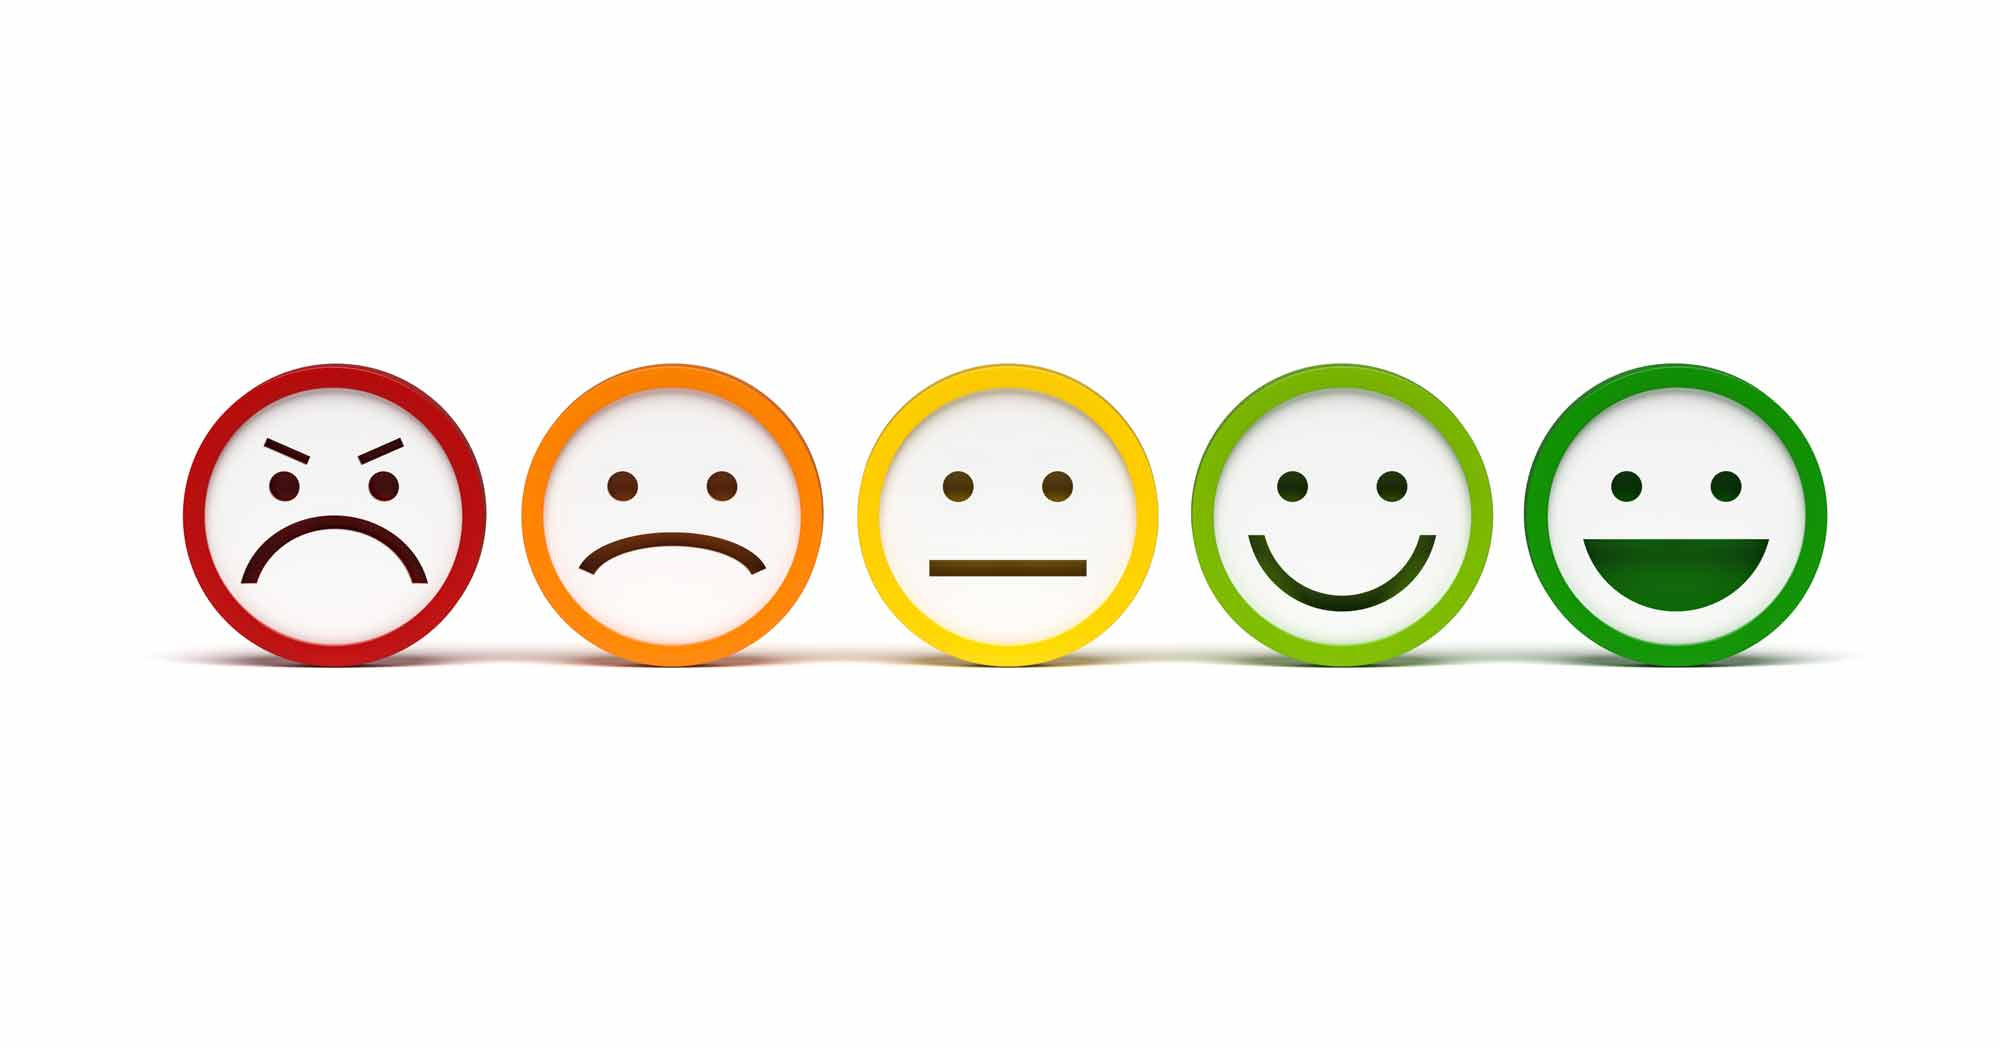

In this analysis, we leverage the "vaderSentiment" package to delve into the various steps of Natural Language Processing (NLP). Through this exploration, we aim to gain insights and understanding of the NLP process. Subsequently, we apply the acquired knowledge to conduct sentiment analysis on customer reviews of a Domino's Pizza chain. By employing the "vaderSentiment" package, we can effectively analyze the sentiment expressed in these reviews and extract valuable information regarding customer satisfaction and feedback.

### **Exploring NLP Steps**

**Install Required Packages**

In [ ]:
!pip install vaderSentiment
!pip install svgling

**Import Necessary Libraries**

In [ ]:
import nltk 
import nltk.corpus
nltk.download('all')
import re
import svgling
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#nltk.download('all')
#pip install  vaderSentiment
#pip install svgling

**NLP Steps:**

In [ ]:
text = "I love taking long walks on the beach with Vibeesh!" 

In [ ]:
# Remove Special Characters using the regular expression package: 

text = re.sub('[^A-Za-z0-9]+', ' ', text) 
text

'I love taking long walks on the beach with Vibeesh '

Tokenization: This step involves breaking down a text into individual words, phrases, or other meaningful units known as tokens. Tokenization helps to organize the text and prepare it for further analysis.

In [ ]:
# Tokenize
from nltk.tokenize import word_tokenize # Passing the string text into word tokenize for bre
tokens = word_tokenize(text.lower())
tokens

['i',
 'love',
 'taking',
 'long',
 'walks',
 'on',
 'the',
 'beach',
 'with',
 'vibeesh']

Stopword Removal: Stopwords are commonly used words in a language that do not carry significant meaning, such as "the," "and," or "in." Removing stopwords from text helps to eliminate noise and reduce the dimensionality of the data.

In [ ]:
# importing stopwords from nltk library
from nltk.corpus import stopwords

print(stopwords.words('english')[:10])

a = set(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [ ]:
# Remove stop words
cleaned_text = [x for x in tokens if x not in a] 
print(cleaned_text) 

['love', 'taking', 'long', 'walks', 'beach', 'vibeesh']


Lemmatization: Lemmatization is the process of reducing words to their base or root form, known as the lemma.

In [ ]:
# Importing Lemmatizer library from nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmed=[]
for i in cleaned_text:
  # Create Lemma for the words
  i= lemmatizer.lemmatize(i)
 # i = pst.stem(i)
  lemmed.append(i)
lemmed

['love', 'taking', 'long', 'walk', 'beach', 'vibeesh']

Part-of-Speech (POS) Tagging: POS tagging involves assigning grammatical tags to words in a sentence, such as noun, verb, adjective, etc. POS tagging provides contextual information about the words and their roles in the sentence, which can be useful for understanding the meaning and structure of the text.

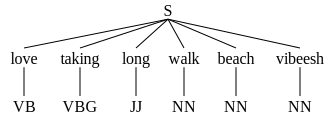

In [ ]:
# POS Tagging
from nltk import ne_chunk# tokenize and POS Tagging before doing chunk
# Check the abbreviations of the tags on https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
tags = nltk.pos_tag(lemmed)
chunk = ne_chunk(tags)
chunk

Use the Vader library to perform sentiment analysis on the sentence:

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

def sentiment_scores(sentence):
# Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
# polarity_scores method of SentimentIntensityAnalyzer
    sentiment_dict = sid_obj.polarity_scores(sentence)
    print("Overall sentiment dictionary is : ", sentiment_dict)
    print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
    print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
    print("Sentence Overall Rated As", end = " ")
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        print("Positive")
    elif sentiment_dict['compound'] <= - 0.05 :
        print("Negative")
    else :
        print("Neutral")

In [ ]:
processed_sentence= ' '.join(lemmed)

sentiment_scores(processed_sentence)

Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.6369}
sentence was rated as  0.0 % Negative
sentence was rated as  54.300000000000004 % Neutral
sentence was rated as  45.7 % Positive
Sentence Overall Rated As Positive


We Can see that the sentence "I love taking long walks on the beach with Vibeesh!" is a Neutral to Positive Sentence.

###**Sentiment Analysis on Dominos Pizza reviews:**

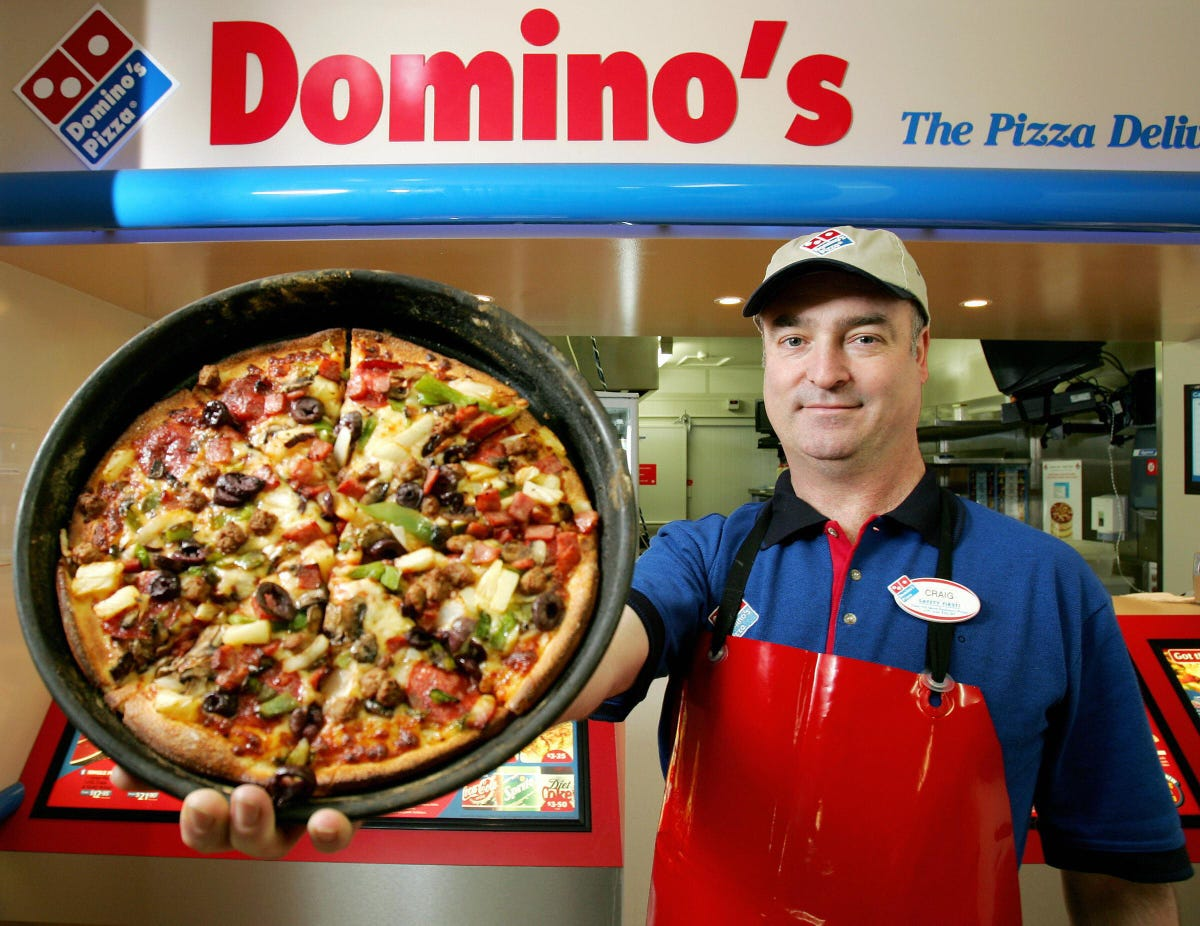

In [ ]:
# install and import pandas library
import pandas as pd

# Creating a pandas dataframe from reviews.txt file
data = pd.read_csv('Dominos Reviews.txt', sep='\t')
print(data.head())

   Unnamed: 0                                             review
0           1  Absolutely love the value with their "buy at l...
1           2  Ordered food from Domino's on North 25th stree...
2           3  Ordered a veggie lover's pizza without onion f...
3           4  Just another good experience with the Domino's...
4           5  Review for Dominos del Amo bl, Lakewood CA. Ve...


In [ ]:
# Drop the first column

mydata = data.drop('Unnamed: 0', axis=1) 
mydata

,review
0,"Absolutely love the value with their ""buy at l..."
1,Ordered food from Domino's on North 25th stree...
2,Ordered a veggie lover's pizza without onion f...
3,Just another good experience with the Domino's...
4,"Review for Dominos del Amo bl, Lakewood CA. Ve..."
...,...
138,Dominos has great pizzas and fast delivery. I ...
139,"Everyone loves pizza, but this dominos is even..."
140,I love dominos so much. Way better than compet...
141,Their pizza tastes really good and they offer ...


In [ ]:
# Convert the column to a list

review_list = mydata['review'].to_list()
len(review_list)

143

In [ ]:
# Loop through the list of reviews and perform the same steps as above to clean and structure the reviews
cleaned_reviews=[]
for r in review_list:
  # Remove Special Characters:
  text = re.sub('[^A-Za-z0-9]+', ' ', r) 
  tokens = word_tokenize(text.lower())
  a = set(stopwords.words('english'))
  # Remove stop words
  cleaned_text = [x for x in tokens if x not in a]
  # Importing Lemmatizer library from nltk
  lemmatizer = WordNetLemmatizer()
  lemmed=[]
  for i in cleaned_text:
    # Create Lemma for the words 
    i= lemmatizer.lemmatize(i)
  # i = pst.stem(i)
    lemmed.append(i)
  cleaned_reviews.append(' '.join(lemmed))


In [ ]:
mydata['clean_reviews']=cleaned_reviews
mydata

,review,clean_reviews
0,"Absolutely love the value with their ""buy at l...",absolutely love value buy least two deal going...
1,Ordered food from Domino's on North 25th stree...,ordered food domino north 25th street derick t...
2,Ordered a veggie lover's pizza without onion f...,ordered veggie lover pizza without onion locat...
3,Just another good experience with the Domino's...,another good experience domino pizza store kat...
4,"Review for Dominos del Amo bl, Lakewood CA. Ve...",review domino del amo bl lakewood ca highly re...
...,...,...
138,Dominos has great pizzas and fast delivery. I ...,domino great pizza fast delivery love close home
139,"Everyone loves pizza, but this dominos is even...",everyone love pizza domino even better fantast...
140,I love dominos so much. Way better than compet...,love domino much way better competitor like pi...
141,Their pizza tastes really good and they offer ...,pizza taste really good offer great deal happy...


In [ ]:
# Loop through the cleaned reviews and use Vader to perform sentiment analysis

score=[]
sentiment=[]
pos=[]
neg=[]
neu=[]
def sentiment_scores(sentence):
# Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
# polarity_scores method of SentimentIntensityAnalyzer
# object gives a sentiment dictionary.
# which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
    pos.append(sentiment_dict['pos']*100)
    neg.append(sentiment_dict['neg']*100)
    neu.append(sentiment_dict['neu']*100)
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        sentiment.append("Positive")
    elif sentiment_dict['compound'] <= - 0.05 :
        sentiment.append("Negative")
    else :
        sentiment.append("Nuetral")

for j in cleaned_reviews:
  sentiment_scores(j)

mydata['Positive']=pos
mydata['Negative']=neg
mydata['Neutral']=neu
mydata['Sentiment']=sentiment

mydata

,review,clean_reviews,Positive,Negative,Neutral,Sentiment
0,"Absolutely love the value with their ""buy at l...",absolutely love value buy least two deal going...,47.3,0.0,52.7,Positive
1,Ordered food from Domino's on North 25th stree...,ordered food domino north 25th street derick t...,32.0,0.0,68.0,Positive
2,Ordered a veggie lover's pizza without onion f...,ordered veggie lover pizza without onion locat...,23.7,8.1,68.2,Positive
3,Just another good experience with the Domino's...,another good experience domino pizza store kat...,23.1,2.4,74.5,Positive
4,"Review for Dominos del Amo bl, Lakewood CA. Ve...",review domino del amo bl lakewood ca highly re...,49.4,0.0,50.6,Positive
...,...,...,...,...,...,...
138,Dominos has great pizzas and fast delivery. I ...,domino great pizza fast delivery love close home,58.0,0.0,42.0,Positive
139,"Everyone loves pizza, but this dominos is even...",everyone love pizza domino even better fantast...,68.2,0.0,31.8,Positive
140,I love dominos so much. Way better than compet...,love domino much way better competitor like pi...,59.3,0.0,40.7,Positive
141,Their pizza tastes really good and they offer ...,pizza taste really good offer great deal happy...,61.7,0.0,38.3,Positive


In [ ]:
import plotly.express as px

labels=['Positive','Negative','Neutral']
values= [mydata['Sentiment'].value_counts()[0],mydata['Sentiment'].value_counts()[1],mydata['Sentiment'].value_counts()[2]]

fig1 = px.pie(labels, names = labels,values = values,color = labels)

fig1.update_traces(title = 'Sentiments of Reviews',
                   title_font = dict(size=25,family='Verdana' ),
                   hoverinfo='label+percent',
                   textinfo='percent', textfont_size=20)

fig1.show()

As expected, there are more number of positive and negative reviews compared to neutral ones.